# DTSA 5509 Supervised Learning Final Project - Edible Mushroom Classification

## Project Topic
##### When it comes to determining whether a wild mushroom is poisonous or not, there is no "simple rule" like there often is for other wild plant species. Thus, we can leverage an existing dataset that contains a number of categorical mushroom features in order to train a supervised binary classification algorithm that can help us determine whether a specific mushroom is likely to be poisonous or edible.

## Data
##### The data was found at this link: https://archive.ics.uci.edu/dataset/73/mushroom. It is public data from the UCI repository and the citation is as follows: Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T. 
##### The data is tabulated and contains 8124 rows and 22 features. All features are either Categorical or Binary, and the data is in a single-table form and gathered from a single data source. All features are possible descriptors of the features of a mushroom, and each entry corresponds to a single letter in the data. Some interesting features include the type of Odor of the mushroom and its natural Habitat. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("agaricus-lepiota.data")
print(df.columns)

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stock-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


## Data Cleaning
##### Our first step when cleaning our data is to convert all of our columns/features to the "category" dtype rather than "object" because all of our features are categorical, and it makes them easier to work with. Next, the documentation on the website makes a note that, for the "stalk-root" feature, 2480 entries have a "?" instead of an actual category because the value was not known. Since "?" isn't a valid category value, we should do something with this data. Since 2480 entries is less than one-third of the total 8124 entries, I opted not to drop the whole column, and instead decided to just drop all rows with a "?". I feel as if this should still give us plenty of data to work with, and it makes our conclusions more valid when we opt to only use valid categories.

Number of data rows before cleaning: 8124


Original dtypes of columns: 

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stock-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Modified dtypes of columns: 

poisonous                   category
cap-shape                   category
ca

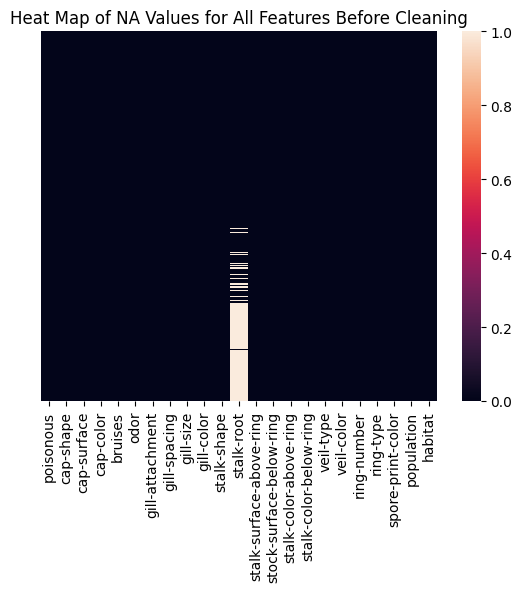


Number of invalid values in each column after cleaning: 

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stock-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Number of data rows after cleaning: 5644



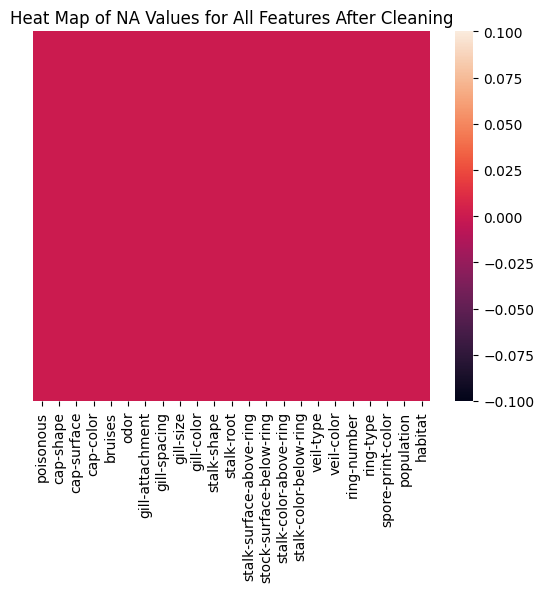

In [2]:
# Check our initial DataFrame object
print("Number of data rows before cleaning: " + str(len(df)) + "\n")
print("\nOriginal dtypes of columns: \n")
print(df.dtypes)

# Transform columns from "object" to "category"
df = df.astype("category")
print("\nModified dtypes of columns: \n")
print(df.dtypes)

# Handle invalid "?" values in column
df["stalk-root"] = df["stalk-root"].replace("?", pd.NA)
print("\nNumber of invalid values in each column before cleaning: \n")
print(df.isna().sum())
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Heat Map of NA Values for All Features Before Cleaning")
plt.show()
df = df.dropna()
print("\nNumber of invalid values in each column after cleaning: \n")
print(df.isna().sum())
print("\nNumber of data rows after cleaning: " + str(len(df)) + "\n")
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Heat Map of NA Values for All Features After Cleaning")
plt.show()

## Exploratory Data Analysis
##### As we can see from the bar plots of each factor, all of our factors are categorical in nature, with each category represented by a single lower-case letter. The factors "poisonous", "bruises", "gill-attachment", "gill-spacing", "gill-size", and "stalk-shape" only have 2 possible categories and are thus Binary Categorical factors. Interestingly, we can see that the factor "veil-type" only has 1 possible category within the subset of our cleaned data, so we can eliminate that factor altogether, as it wouldn't add anything meaningful to our model. As far as distributions go, some of our factors show certain categories as having much less representation than others within that factor. However, since our factors are all categorical, there aren't really any "outliers" to worry about, so we don't need to worry about modifying our data for this. Additionally, if a lesser-represented category occurring happened to always correlate with a mushroom being poisonous or vice versa, we would want the model to know that.
##### After conducting Chi-Squared tests between each factor to look for associations, we found that the vast majority of our factors show a statistically-significant association with one another at an alpha level of 0.05. However, given that the data itself is more "descriptive" than "experimental", this isn't entirely surprising. Also, given that our data isn't numerical, there isn't really a need to transform or normalize it. Finally, I would predict that factors that have more of an even distribution among their categories are more likely to be important for the model, as factors that are predominantly one category aren't likely to tell us much.

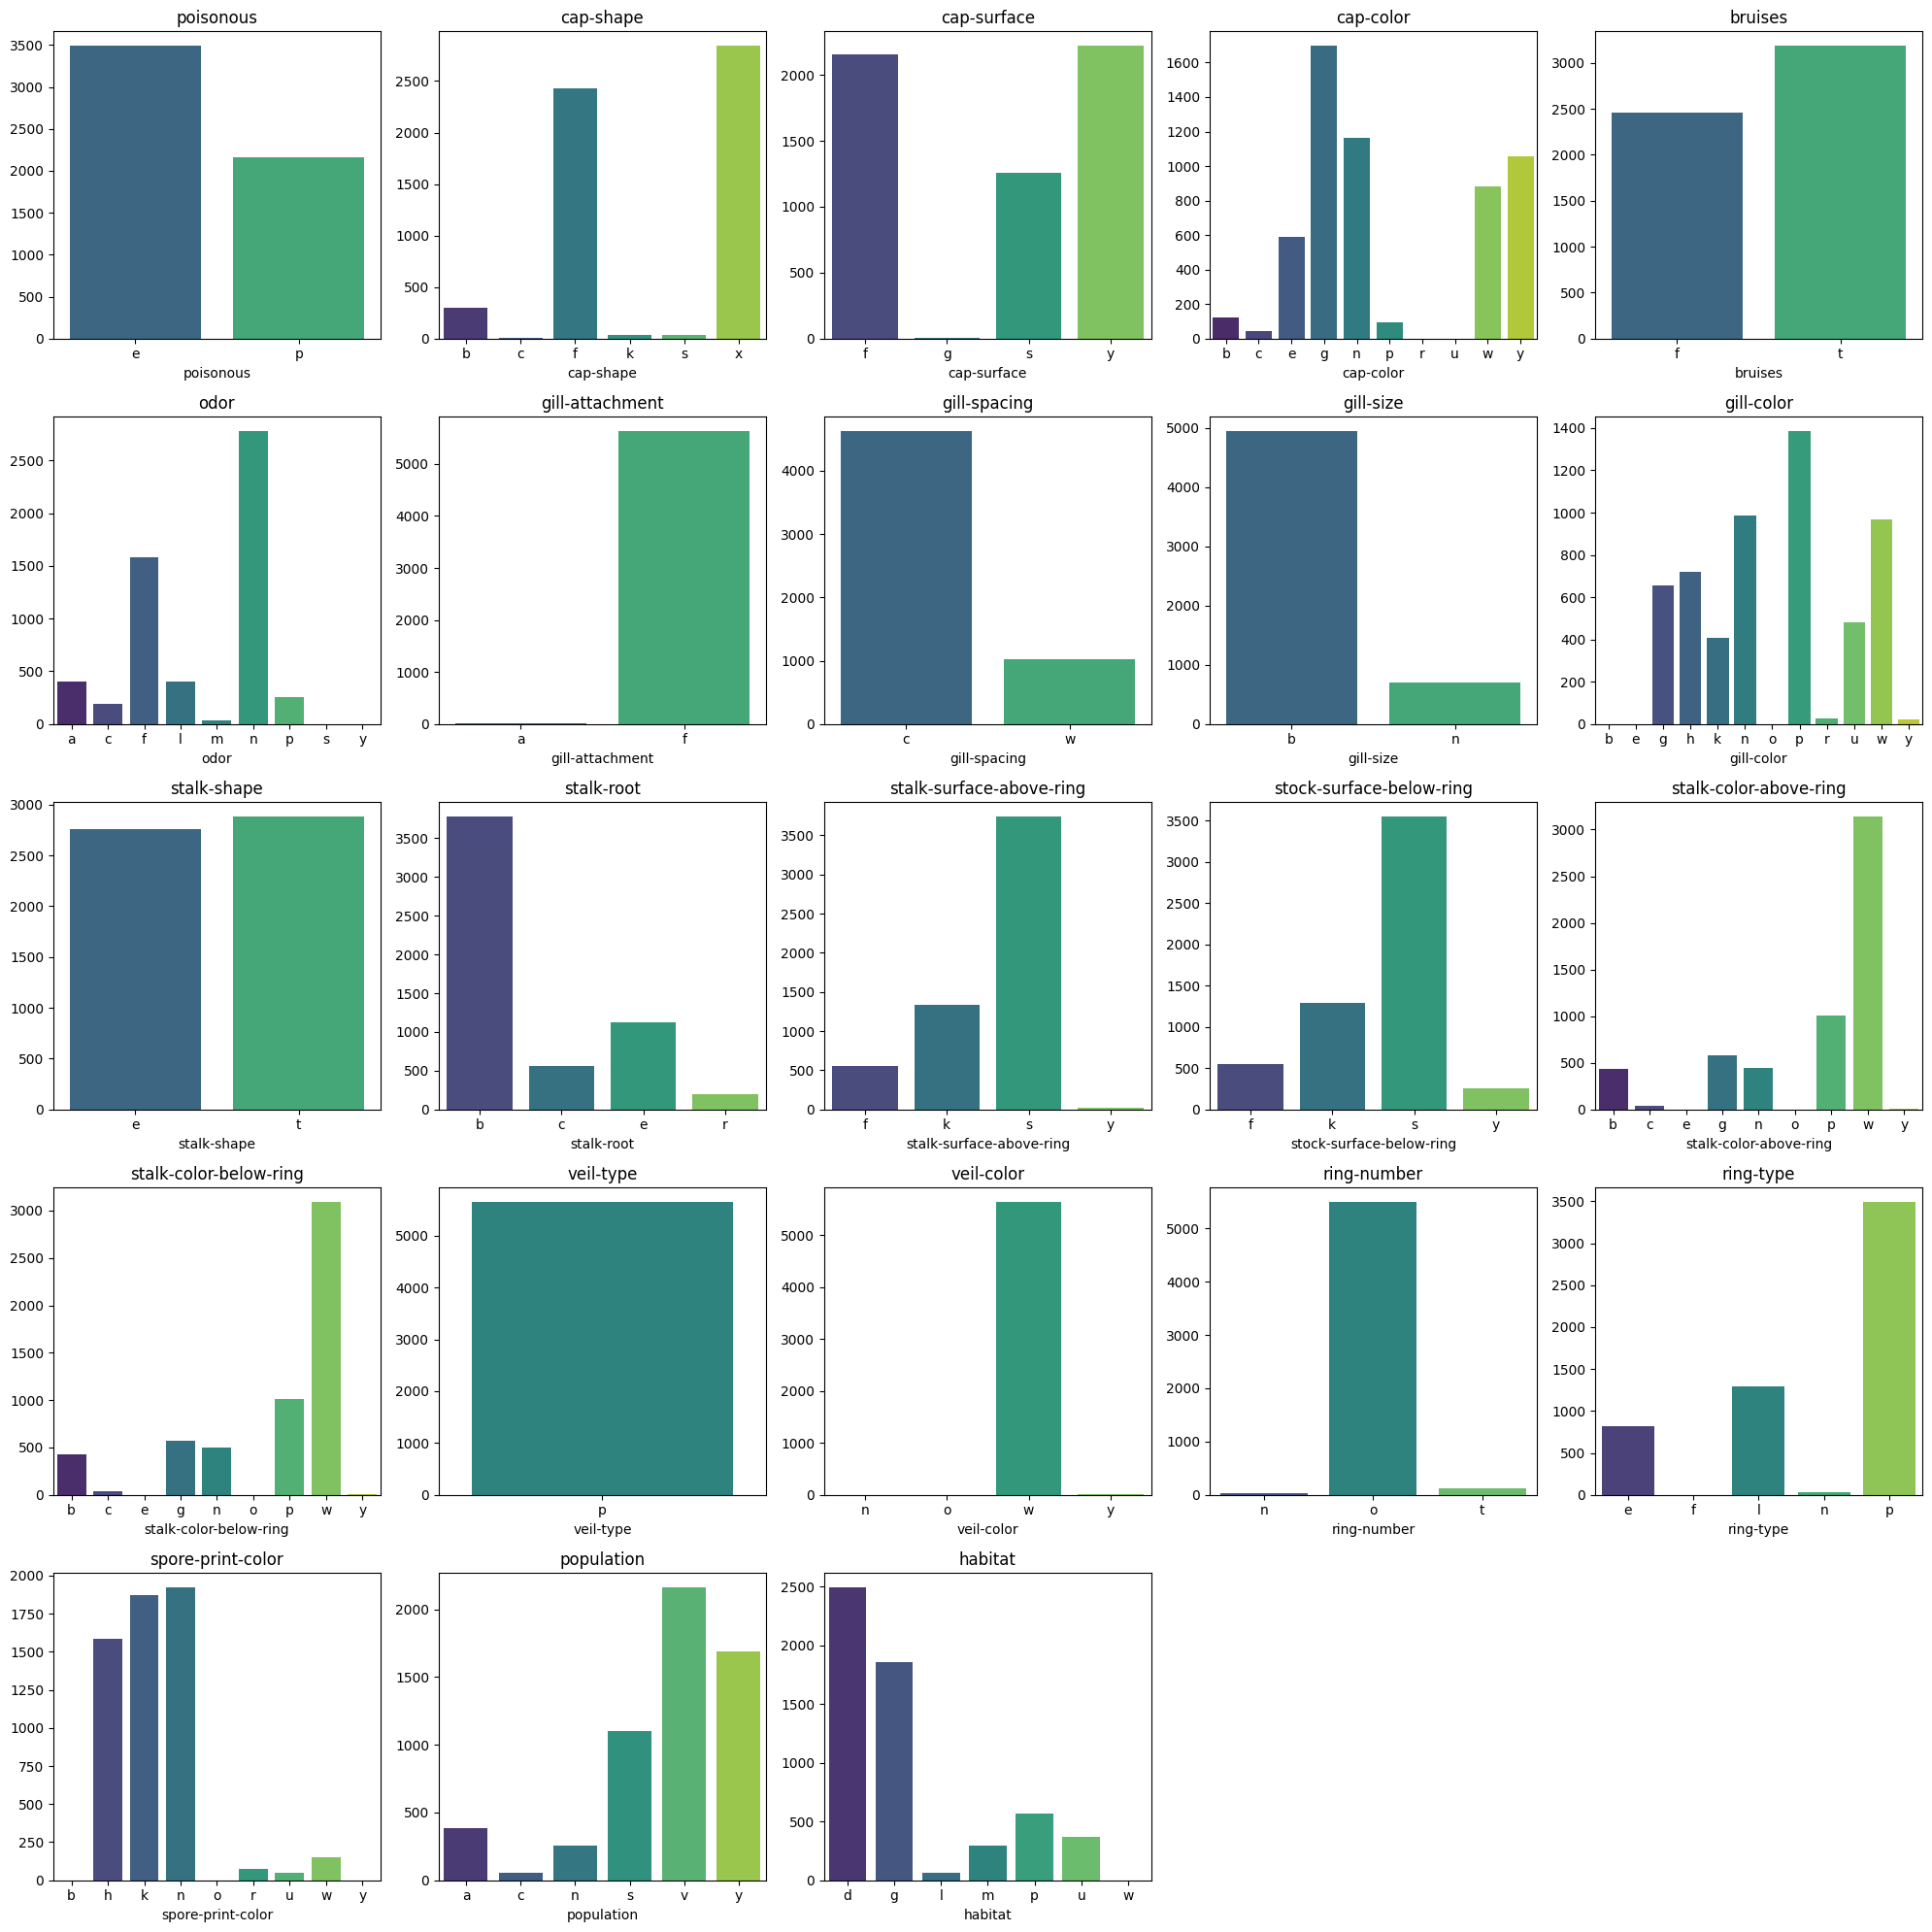

'# Drop all features where most common category makes up over 80% of data\ndrop = []\nfor column in df.columns:\n    most_common_prop = df[column].value_counts(normalize=True).max()\n    if most_common_prop > 0.8:\n        drop.append(column)\n\ndf.drop(columns=drop, inplace=True)'

In [3]:
n_rows = 5
n_cols = 5

# Create figure and axes for Matplotlib
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between plots

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through all categorical columns and create bar plots
for i, column in enumerate(df.columns):
    if i < len(df.columns):
        value_counts = df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="viridis")
        axes[i].set_title(column)
        axes[i].tick_params(axis='x')  # Rotate x labels for better readability

# Hide any unused subplots
for i in range(len(df.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Eliminate unnecesary column due to only one category in data
df.drop("veil-type", axis=1, inplace=True)

'''# Drop all features where most common category makes up over 80% of data
drop = []
for column in df.columns:
    most_common_prop = df[column].value_counts(normalize=True).max()
    if most_common_prop > 0.8:
        drop.append(column)

df.drop(columns=drop, inplace=True)'''

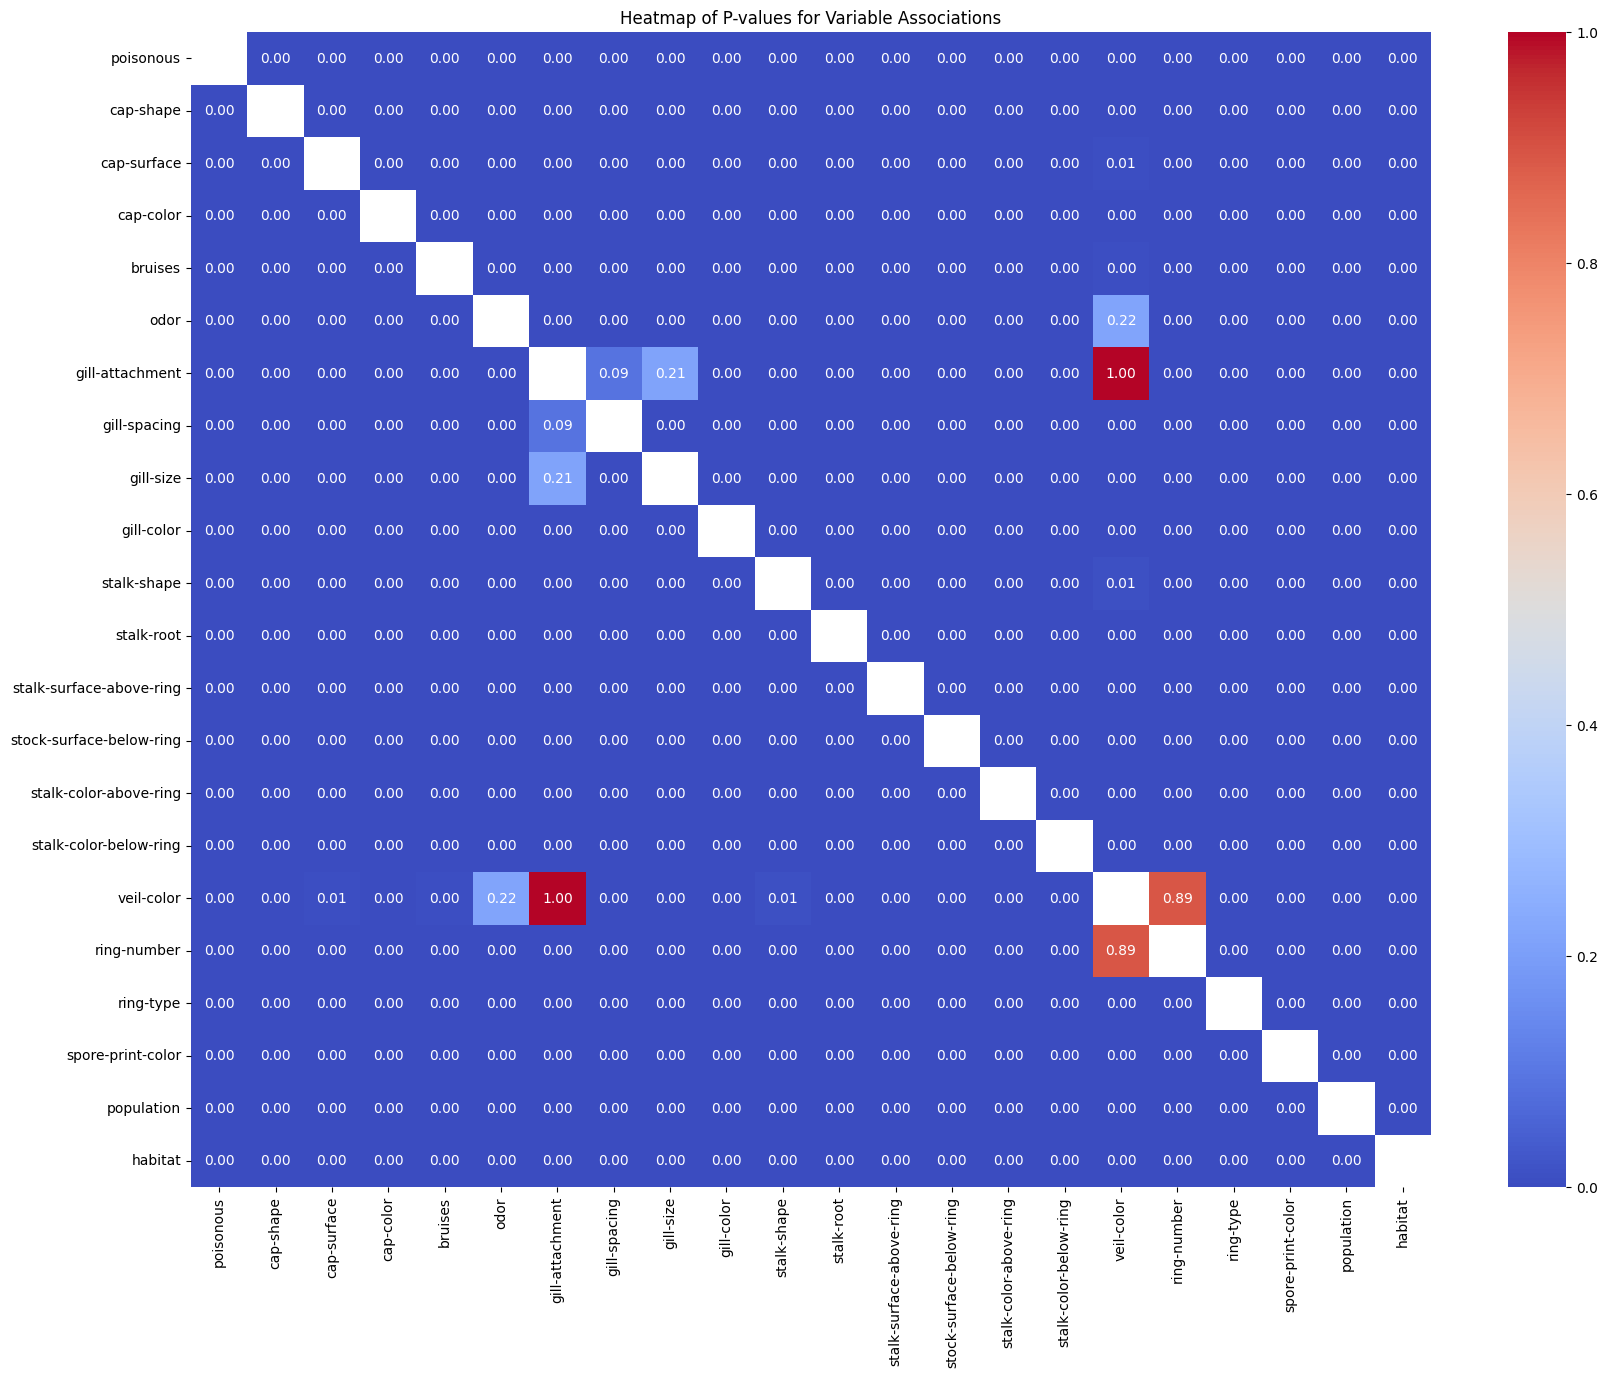

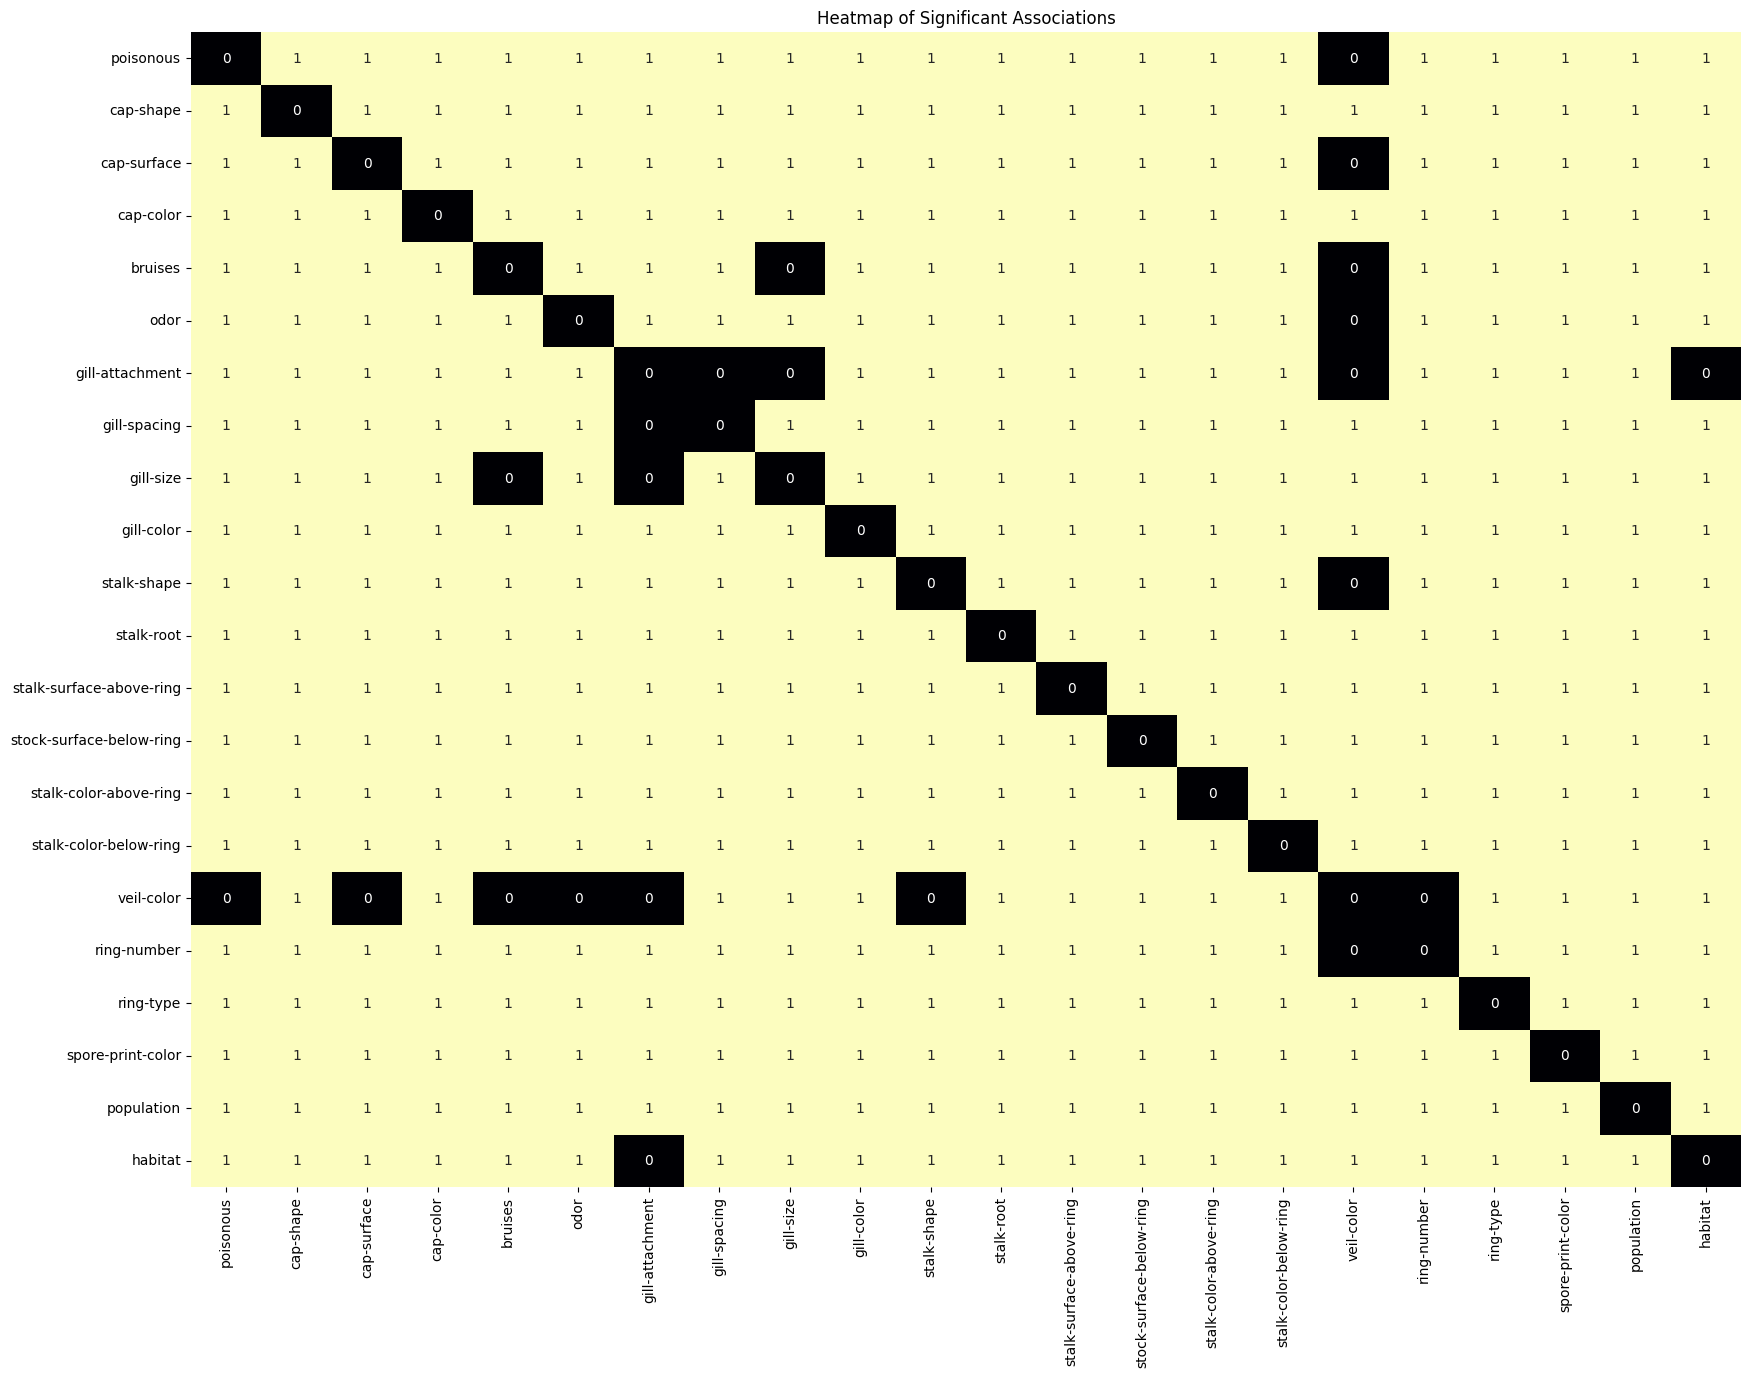

In [4]:
from scipy.stats import chi2_contingency

# Initialize a DataFrame to store P-values
columns = df.columns
p_values = pd.DataFrame(index=columns, columns=columns)

# Perform Chi-Squared tests
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values.at[col1, col2] = p

# Adjust for multiple comparisons using Bonferroni correction
alpha = 0.05  # Set significance level
num_tests = len(columns) * (len(columns) - 1) / 2 
adjusted_alpha = alpha / num_tests

# Check which P-values are significant after adjustment
significant_pairs = p_values < adjusted_alpha

# Plot a heatmap of p-values from Chi-Squared tests between factors
plt.figure(figsize=(20, 15))
sns.heatmap(p_values.astype(float), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of P-values for Variable Associations")
plt.show()

# Plot a heatmap of associations that were found to be significant
significant_matrix = p_values < adjusted_alpha
plt.figure(figsize=(20, 15))
sns.heatmap(significant_matrix, cmap="magma", cbar=False, annot=True)
plt.title("Heatmap of Significant Associations")
plt.show()

## Models
##### In order to find the right models to use with our data, we need to consider the fact that we're performing a Classification problem on a number of Categorical-only features. We first learned how to solve Classification problems with Logistic Regression models in class, so I choose that as my first model. However, since these models tend to be easily influenced by collinearity, we pass in "l2" as our "penalty" parameter to the model in order to introduce regularization that penalizes large coefficients. The coefficient values generated by the model are printed by the following code block, and we can see that they're all quite close together, indicating that our features are similarly important.
##### The second model I chose for my data is the Random Forest Classifier. Tree-based models are known for handling collinearity well, so there was not much adjustment that had to be made. The importances of each feature according to the model are also printed by the following code block, and they are all also quite close together, also indicating that our features are similarly important.
##### The third and final model I chose for my data is an SVC model. This particular model uses the "rbf" kernel rather than the "linear" kernel, so we don't have to adjust much for collinearity. The best results seemed to come when the hyperparameters "C" and "gamma" were both adjusted to 1.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import time

# Create our training and test data
y = df["poisonous"]
x = df.drop("poisonous", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Encode our categorical variables as numbers for our models
column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), x.columns)])

# Define the models
logistic_regression_model = make_pipeline(column_transformer, LogisticRegression(penalty="l2", max_iter=1000))
random_forest_model = make_pipeline(column_transformer, RandomForestClassifier())
svc_model = make_pipeline(column_transformer, SVC(C=1, gamma=1))
svc_model_alt = make_pipeline(column_transformer, SVC(C=0.5, gamma=2))

# Fit the models and record training times
st = time.time()
logistic_regression_model.fit(x_train, y_train)
et = time.time()
lrt = (et - st) * 1000

st = time.time()
random_forest_model.fit(x_train, y_train)
et = time.time()
rft = (et - st) * 1000

st = time.time()
svc_model.fit(x_train, y_train)
et = time.time()
svct = (et - st) * 1000

svc_model_alt.fit(x_train, y_train)

# Print summaries of models
fe = logistic_regression_model.named_steps["logisticregression"]
print("\nCoefficients for LogisticRegression Model:\n", fe.coef_[0])
fe = random_forest_model.named_steps["randomforestclassifier"]
print("\nFeature Importances for RandomForestClassifier Model:\n", fe.feature_importances_)


Coefficients for LogisticRegression Model:
 [ 1.48253895e-01  4.15108045e-01  1.55378648e-01 -5.48325205e-02
 -4.62859191e-01  5.18788004e-02 -8.87000373e-01  4.56332589e-01
  4.69499103e-01  2.14096357e-01  9.74798138e-01 -5.75717446e-01
 -2.33663155e-01 -3.14485748e-02 -5.13283417e-01  7.11704410e-01
  4.53043416e-01 -5.32505694e-01  8.77956049e-02  1.65132071e-01
 -2.44729094e+00  2.29675248e+00  2.41483433e+00 -2.46409909e+00
  4.65779943e-01 -2.81371303e+00  2.80066399e+00  2.14135397e-01
  3.87922798e-02  4.92756565e-01 -2.39828889e-01 -1.17811733e+00
  1.43104500e+00 -6.26189957e-02  4.21357347e-01 -3.91380738e-01
 -4.10950586e-01 -1.16024232e-01  4.41600545e-01  1.13123661e-01
 -3.84392157e-01  6.42212832e-01  1.64583675e+00 -1.39290908e+00
  1.99288418e+00 -1.32271445e+00  2.80641983e-01 -6.97884029e-01
 -2.94947309e-01  1.17321027e+00 -9.05077968e-01  2.79742679e-01
 -5.38742607e-02  7.07430331e-01 -4.48266987e-01  4.76385931e-02
  2.04028872e-01  4.65779943e-01 -3.41606189e

## Results and Analysis
##### To evaluate the results of my models, I decided to focus on four different metrics: accuracy, precision, recall, and F1 score. Accuracy is useful for measuring the overall correctness of the model, precision is useful when we want to minimize false positives, recall is useful when minimizing false negatives, and F1 score gives us an average of precision and recall that isn't as affected by imbalanced datasets. Somewhat amazingly, all 4 metrics for each of the 3 models ended up as 1.0, indicating that all of the models made essentially perfect predictions on the test data. Thus, in order to better compare each model, we turn to execution times for training. The Logistic Regression model performed the best at around 20ms to train on our data, which is several orders of magnitude faster than the SVC model, which took almost 1200ms to train. In the middle, we have the Random Forest model at around 200ms. Therefore, if all models predict equally well, we would likely pick the fastest-performing one over the others, which is the Logistic Regression model in this case. 

Logistic Regression Model - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Random Forest Model - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
SVC Model - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Alternate SVC Model (C=0.5, gamma=2) - Accuracy: 0.6280, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000




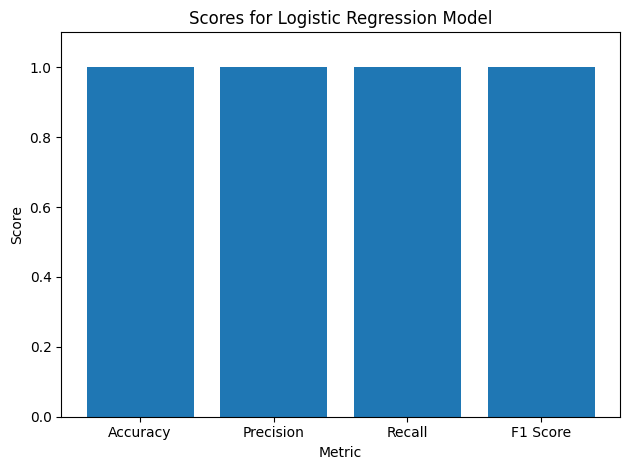

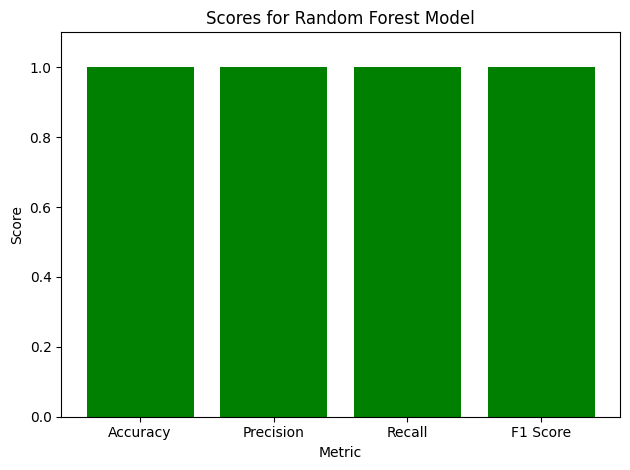

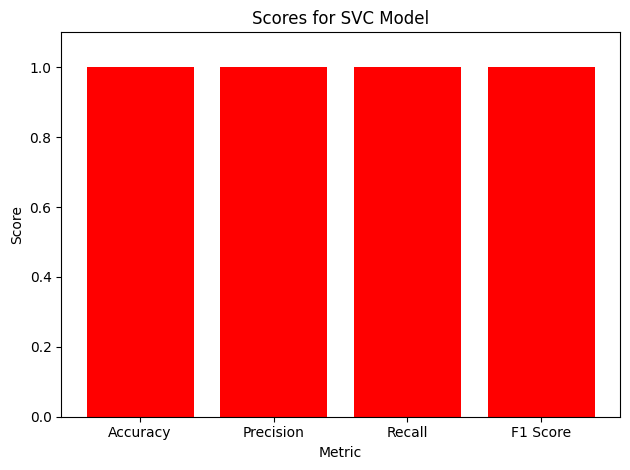

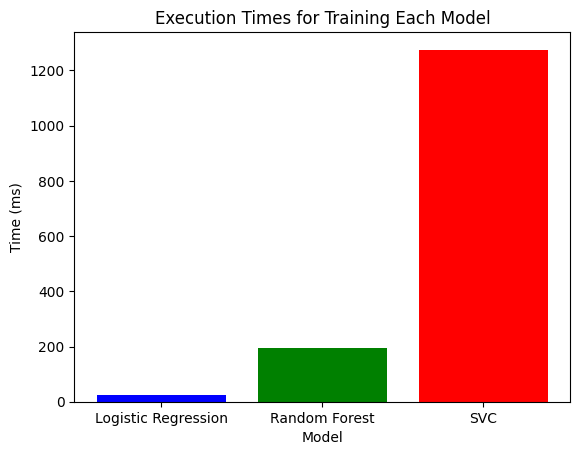

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions
y_pred_logistic = logistic_regression_model.predict(x_test)
y_pred_forest = random_forest_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)
y_pred_svc_alt = svc_model_alt.predict(x_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc_alt = accuracy_score(y_test, y_pred_svc_alt)

# Calculate precision
precision_logistic = precision_score(y_test, y_pred_logistic, average="binary", pos_label="p")
precision_forest = precision_score(y_test, y_pred_forest, average="binary", pos_label="p")
precision_svc = precision_score(y_test, y_pred_svc, average="binary", pos_label="p")
precision_svc_alt = precision_score(y_test, y_pred_svc_alt, average="binary", pos_label="p")

# Calculate recall
recall_logistic = recall_score(y_test, y_pred_logistic, average="binary", pos_label="p")
recall_forest = recall_score(y_test, y_pred_forest, average="binary", pos_label="p")
recall_svc = recall_score(y_test, y_pred_svc, average="binary", pos_label="p")
recall_svc_alt = recall_score(y_test, y_pred_svc_alt, average="binary", pos_label="p")

# Calculate F1 score
f1_logistic = f1_score(y_test, y_pred_logistic, average="binary", pos_label="p")
f1_forest = f1_score(y_test, y_pred_forest, average="binary", pos_label="p")
f1_svc = f1_score(y_test, y_pred_svc, average="binary", pos_label="p")
f1_svc_alt = f1_score(y_test, y_pred_svc_alt, average="binary", pos_label="p")

# Print the results
print(f"Logistic Regression Model - Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1 Score: {f1_logistic:.4f}")
print(f"Random Forest Model - Accuracy: {accuracy_forest:.4f}, Precision: {precision_forest:.4f}, Recall: {recall_forest:.4f}, F1 Score: {f1_forest:.4f}")
print(f"SVC Model - Accuracy: {accuracy_svc:.4f}, Precision: {precision_svc:.4f}, Recall: {recall_svc:.4f}, F1 Score: {f1_svc:.4f}")
print(f"Alternate SVC Model (C=0.5, gamma=2) - Accuracy: {accuracy_svc_alt:.4f}, Precision: {precision_svc_alt:.4f}, Recall: {recall_svc_alt:.4f}, F1 Score: {f1_svc_alt:.4f}\n\n")

# Create visualizations for results
data = {"Category": ["Accuracy", "Precision", "Recall", "F1 Score"], 
        "Logistic Regression Model": [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic],
        "Random Forest Model": [accuracy_forest, precision_forest, recall_forest, f1_forest],
        "SVC Model": [accuracy_svc, precision_svc, recall_svc, f1_svc]}
rdf = pd.DataFrame(data)

plt.bar(rdf["Category"], rdf["Logistic Regression Model"])
plt.title("Scores for Logistic Regression Model")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1.1)  # Extend y-axis a bit above 100% for visual clarity
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

plt.bar(rdf["Category"], rdf["Random Forest Model"], color="Green")
plt.title("Scores for Random Forest Model")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1.1) 
plt.tight_layout()
plt.show()

plt.bar(rdf["Category"], rdf["SVC Model"], color="Red")
plt.title("Scores for SVC Model")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1.1)
plt.tight_layout() 
plt.show()

# Create a visualization for different model execution times
data = {"Model": ["Logistic Regression", "Random Forest", "SVC"], "Times": [lrt, rft, svct]}
tdf = pd.DataFrame(data)
plt.bar(tdf["Model"], tdf["Times"], color=["Blue", "Green", "Red"])
plt.title("Execution Times for Training Each Model")
plt.xlabel("Model")
plt.ylabel("Time (ms)")
plt.show()

## Discussion and Conclusion
##### I would say that the main conclusion to be drawn from this project is that datasets that are basically designed to be as comprehensive as possible about a subject tend to result in good models. It's especially amazing how well our models performed, given that almost 1/3 of the original data was removed during data cleaning. However, it's important to consider the fact that our dataset was made up entirely of categorical variables, while most models are trained on datasets with continuous values. The fact that each factor can only be a few different possible values must greatly simplify the structure of the model, as most continuous data can have essentially an infinite number of values to consider. I also learned that it's possible for a simpler model like a Logistic Regression to achieve the same evaluation metric scores as a model like an SVC, despite being able to train on data much faster.
##### It's a bit unfortunate that all of our evaluation metrics ended up at 1.0, as we didn't get a chance to properly compare values like accuracy between models. If we were using a different dataset, such as one based on continuous factors, our results likely would have been much more varied. Therefore, if I had to do this project again, I would choose a more traditional dataset with minimal categorical factors, as I likely would be able to draw more meaningful conclusions from it.

## Write-up
##### This project was completed as a final project for DTSA 5509 at the University of Colorado, Boulder. Its GitHub repository can be found here: https://github.com/mwcarlson/DS_ML_SL_FP/tree/master.
##### This project was designed as a way to conduct analysis of and compare supervised machine learning models using a dataset found online. Specifically, it uses a dataset used to identify species of mushrooms as poisonous or edible based on a number of their characteristics in order to train and then test each model's ability to classify them. Likely due to the categorical nature of the factors in the dataset, we were able to achieve perfect accuracy and other metrics regardless of model, leaving training execution times as the only main difference between models in this case.